In [56]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
'''confirmed_df.head()'''

'confirmed_df.head()'

In [4]:
'''len(confirmed_df["Country/Region"])'''

'len(confirmed_df["Country/Region"])'

In [5]:
'''for i in range(len(confirmed_df["Country/Region"])):
    print (i, confirmed_df["Country/Region"][i])'''


'for i in range(len(confirmed_df["Country/Region"])):\n    print (i, confirmed_df["Country/Region"][i])'

In [6]:
'''confirmed_df["Country/Region"][236]'''

'confirmed_df["Country/Region"][236]'

In [7]:
print(confirmed_df.loc[[236]])

    Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
236            NaN      Sri Lanka  7.873054  80.771797        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/23/21  5/24/21  5/25/21  \
236        0        0        0        1  ...   164201   167172   169900   

     5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  5/31/21  6/1/21  
236   172277   174861   177711   180593   183452   186364  189241  

[1 rows x 501 columns]


In [8]:
sl_confirmed_df = pd.DataFrame(confirmed_df.loc[[236]])

In [9]:
sl_confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
236,NaN,Sri Lanka,7.873054,80.771797,0,0,0,0,0,1,...,164201,167172,169900,172277,174861,177711,180593,183452,186364,189241


In [10]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [11]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2802,2812,2836,2855,2869,2881,2899,2919,2944,2973
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2444,2445,2447,2447,2447,2448,2449,2450,2451,2451
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3418,3426,3433,3440,3448,3455,3460,3465,3472,3480
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,725,731,735,742,745,749,757,764,766,772


In [12]:
print(deaths_df.loc[[236]])

    Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
236            NaN      Sri Lanka  7.873054  80.771797        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/23/21  5/24/21  5/25/21  \
236        0        0        0        0  ...     1210     1243     1269   

     5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  5/31/21  6/1/21  
236     1298     1298     1363     1363     1441     1441    1484  

[1 rows x 501 columns]


In [13]:
sl_deaths_df = pd.DataFrame(deaths_df.loc[[236]])

In [14]:
sl_deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
236,NaN,Sri Lanka,7.873054,80.771797,0,0,0,0,0,0,...,1210,1243,1269,1298,1298,1363,1363,1441,1441,1484


In [15]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-31-2021.csv')

In [16]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-06-01 04:23:09,33.93911,67.709953,71838,2944,57629.0,11265.0,Afghanistan,184.539074,4.098110
1,NaN,NaN,NaN,Albania,2021-06-01 04:23:09,41.15330,20.168300,132315,2451,129431.0,433.0,Albania,4597.783029,1.852398
2,NaN,NaN,NaN,Algeria,2021-06-01 04:23:09,28.03390,1.659600,128913,3472,89839.0,35602.0,Algeria,293.979325,2.693289
3,NaN,NaN,NaN,Andorra,2021-06-01 04:23:09,42.50630,1.521800,13727,127,13458.0,142.0,Andorra,17766.129554,0.925184
4,NaN,NaN,NaN,Angola,2021-06-01 04:23:09,-11.20270,17.873900,34551,766,28079.0,5706.0,Angola,105.126022,2.217013


In [17]:
'''for i in range(len(latest_data.Country_Region)):
    print (i,latest_data.Country_Region[i])'''

'for i in range(len(latest_data.Country_Region)):\n    print (i,latest_data.Country_Region[i])'

In [18]:
latest_data.Country_Region[618]

'Sri Lanka'

In [19]:
print(latest_data.loc[[618]])

     FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
618   NaN    NaN            NaN      Sri Lanka  2021-06-01 04:23:09  7.873054   

         Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
618  80.771797     186364    1441   151740.0  33183.0    Sri Lanka   

     Incident_Rate  Case_Fatality_Ratio  
618     870.320946             0.773218  


In [20]:
sl_latest_data = pd.DataFrame(latest_data.loc[[618]])

In [21]:
sl_latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
618,NaN,NaN,NaN,Sri Lanka,2021-06-01 04:23:09,7.873054,80.771797,186364,1441,151740.0,33183.0,Sri Lanka,870.320946,0.773218


In [22]:
cols = sl_confirmed_df.keys()

In [23]:
#Get all the dates for the ongoing coronavirus pandemic


In [24]:
sl_confirmed = sl_confirmed_df.loc[:, cols[4]:cols[-1]]
sl_deaths = sl_deaths_df.loc[:, cols[4]:cols[-1]]

In [27]:
dates = sl_confirmed.keys()
sl_cases = []
sl_total_deaths = [] 
sl_mortality_rate = []
# recovery_rate = [] 
# total_recovered = [] 
# total_active = [] 

for i in dates:
    sl_confirmed_sum = sl_confirmed[i].sum()
    sl_death_sum = sl_deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    sl_cases.append(sl_confirmed_sum)
    sl_total_deaths.append(sl_death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    sl_mortality_rate.append(sl_death_sum/sl_confirmed_sum)
#     recovery_rate.append(recovered_sum/confirmed_sum)

<ipython-input-27-6f9bef710ffd>:21: RuntimeWarning: invalid value encountered in long_scalars
  sl_mortality_rate.append(sl_death_sum/sl_confirmed_sum)


In [28]:


#Getting daily increases and moving averages


In [29]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(sl_cases)
world_confirmed_avg= moving_average(sl_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(sl_total_deaths)
world_death_avg = moving_average(sl_total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
# world_daily_recovery = daily_increase(total_recovered)
# world_recovery_avg = moving_average(total_recovered, window)
# world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# active 
# world_active_avg = moving_average(total_active, window)



In [30]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
sl_cases = np.array(sl_cases).reshape(-1, 1)
sl_total_deaths = np.array(sl_total_deaths).reshape(-1, 1)
# total_recovered = np.array(total_recovered).reshape(-1, 1)

In [31]:
#Future forcasting

In [32]:
days_in_future = 20
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-20]

In [33]:
#Convert integer into datetime for better visualization


In [34]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [35]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], sl_cases[50:], test_size=0.03, shuffle=False) 


In [36]:
#Model for predicting # of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example. We will show the results in the later section.


In [37]:
#bla bla bla bla bla

In [38]:

#Worldwide Overview

#Graphing the number of confirmed cases, deaths, and mortality rate (CFR). This gives us a big picture of the ongoing pandemic. 

In [39]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

In [40]:
len(sl_cases)

497

In [41]:
len(sl_total_deaths)

497

In [42]:
len(adjusted_dates)

497

In [52]:
len(future_forcast_dates)

517

In [51]:
len(sl_cases)

497

In [53]:
# # use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [57]:
# svm_search.best_params_

In [58]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

/home/manodya/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE: 37272.77542339819
MSE: 1454845289.9033291


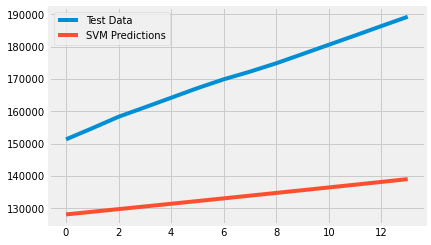

In [59]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [65]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [66]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 43623.933018763484
MSE: 2000439220.9114995


In [67]:
print(linear_model.coef_)

[[-2.93761749e+04  7.99290906e+02 -6.70685457e+00  2.10700041e-02
  -1.91399058e-05]]


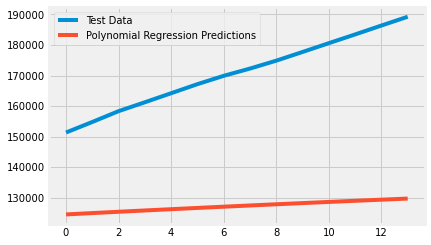

In [68]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [69]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.1s finished
/home/manodya/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [70]:
bayesian_search.best_params_

{'tol': 0.01,
 'normalize': True,
 'lambda_2': 1e-06,
 'lambda_1': 0.0001,
 'alpha_2': 0.001,
 'alpha_1': 1e-06}

In [71]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 45581.299317797544
MSE: 2185689177.8132977


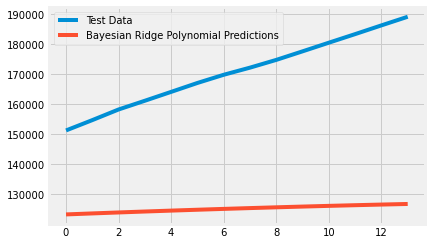

In [72]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [73]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [107]:
len(bayesian_pred[-20:-1])

19

In [108]:
len(svm_pred)

517

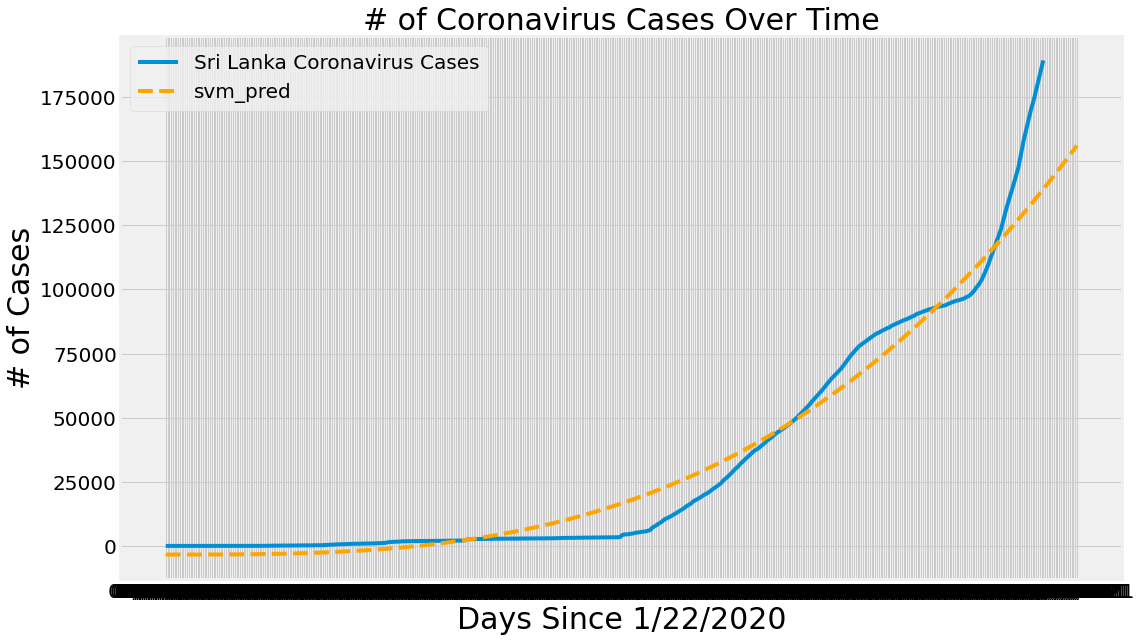

In [119]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(future_forcast_dates[0:-20], sl_cases)
plt.plot(future_forcast_dates[0:-1], svm_pred[0:-1], linestyle='dashed', color='orange')
#plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Sri Lanka Coronavirus Cases', 'svm_pred'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



/home/manodya/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/manodya/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  54.866
Date:                Wed, 02 Jun 2021   AIC                            -97.732
Time:                        20:12:26   BIC                            -94.342
Sample:                             0   HQIC                           -98.428
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.5114      0.281     -8.929      0.000      -3.063      -1.960
ar.L2         -1.4234      0.208     -6.843      0.000      -1.831      -1.016
ar.L3          1.6496      0.472      3.496      0.0

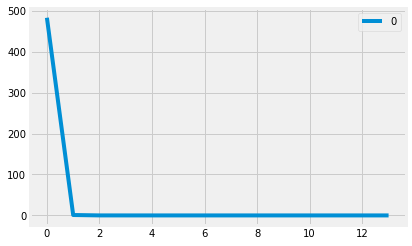

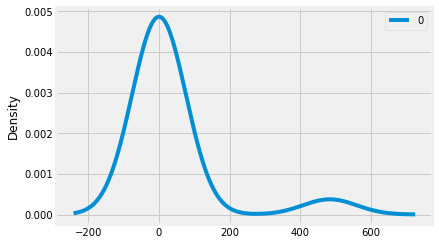

                  0
count  1.400000e+01
mean   3.457319e+01
std    1.290664e+02
min    6.583152e-07
25%    6.583403e-07
50%    6.583753e-07
75%    7.223303e-04
max    4.830000e+02


In [114]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA


# fit model
model = ARIMA(X_test_confirmed, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [121]:
len(adjusted_dates)

497

In [122]:
len(sl_cases)

497

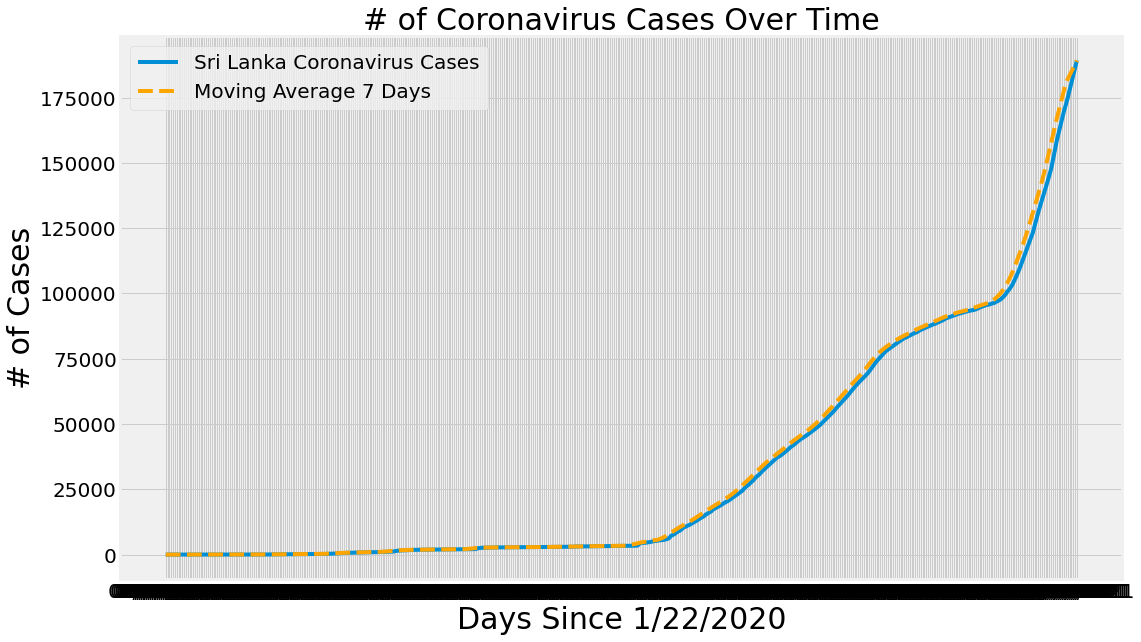

In [120]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(future_forcast_dates[0:-20], sl_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Sri Lanka Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



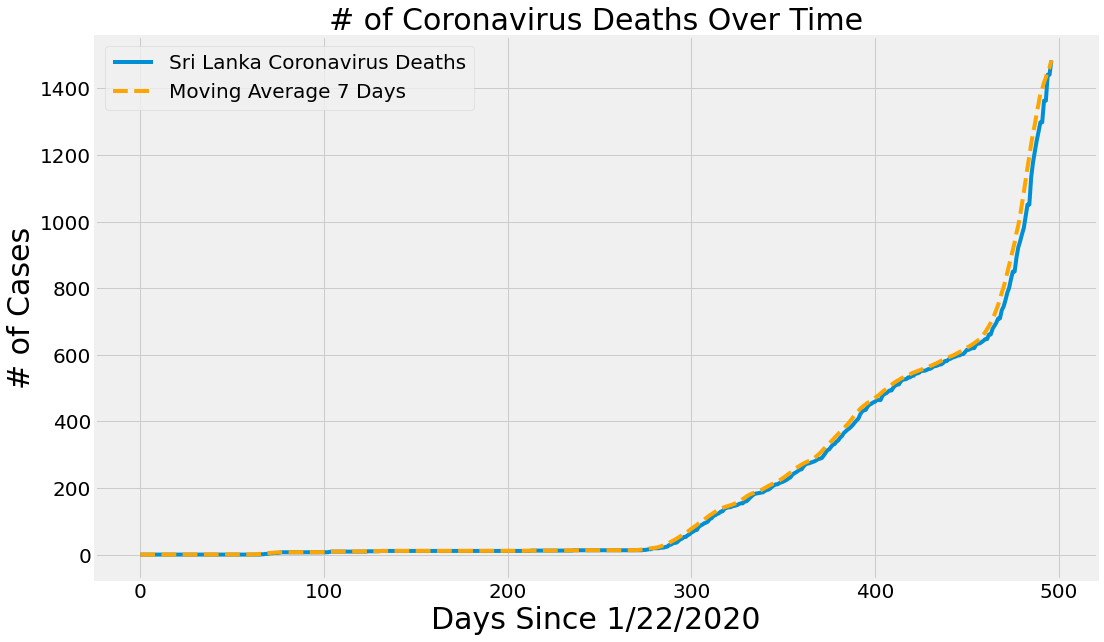

In [78]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, sl_total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Sri Lanka Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [123]:
def country_plot(x, y1, y2, y3, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
#     recovery_increase_avg = moving_average(y4, window)
    
    #plt.figure(figsize=(16, 10))
    #plt.plot(x, y1)
    #plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    #plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    #plt.title('{} Confirmed Cases'.format(country), size=30)
    #plt.xlabel('Days Since 1/22/2020', size=30)
    #plt.ylabel('# of Cases', size=30)
    #plt.xticks(size=20)
    #plt.yticks(size=20)
    #plt.show()

    #plt.figure(figsize=(16, 10))
    #plt.bar(x, y2)
    #plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    #plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    #plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    #plt.xlabel('Days Since 1/22/2020', size=30)
    #plt.ylabel('# of Cases', size=30)
    #plt.xticks(size=20)
    #plt.yticks(size=20)
    #plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

#     plt.figure(figsize=(16, 10))
#     plt.bar(x, y4)
#     plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
#     plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
#     plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
#     plt.xlabel('Days Since 1/22/2020', size=30)
#     plt.ylabel('# of Cases', size=30)
#     plt.xticks(size=20)
#     plt.yticks(size=20)
#     plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)

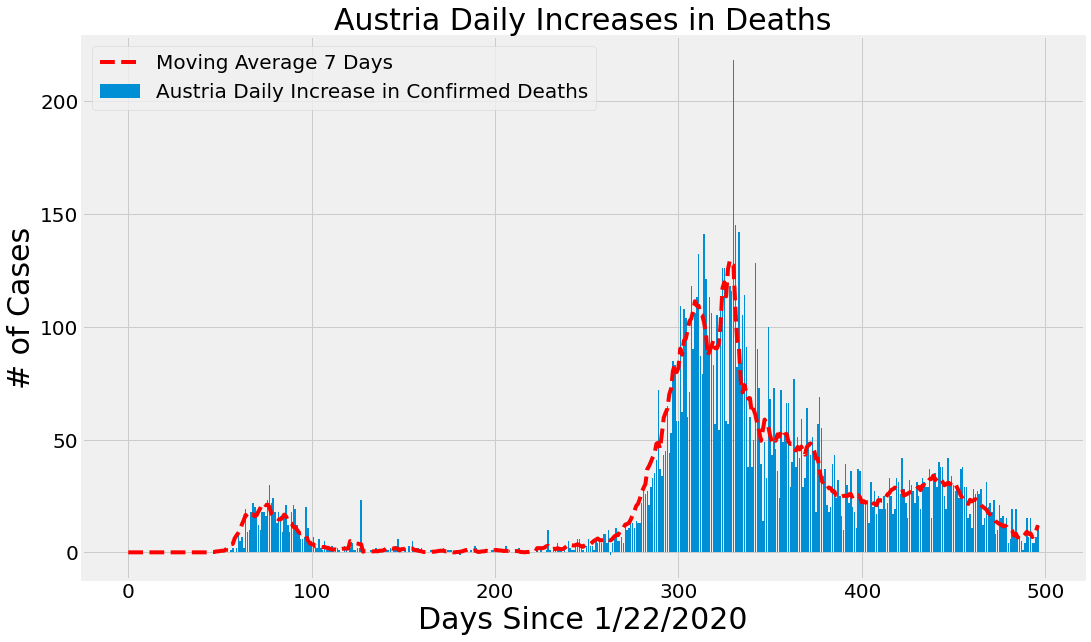

In [127]:
country_visualizations('Austria')